### Summary :
This notebook explores a Logistic Regression model with various SMOTE variations, as well as Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict heroin usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX

- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with ADASYN](#logreg_ADA)
- [Coefficient analysis](#Coef)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Heroin` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [3]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Heroin','Unnamed: 0'],axis=1)
y = df['Heroin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 1}
Best cross-validation score for Logistic Regression: 0.93
Test set score for Logistic Regression: 0.89

Confusion Matrix:
 [[409  46]
 [  6   6]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       455
           1       0.12      0.50      0.19        12

    accuracy                           0.89       467
   macro avg       0.55      0.70      0.56       467
weighted avg       0.96      0.89      0.92       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 1}
Best cross-validation score for Logistic Regression: 0.96
Test set score for Logistic Regression: 0.96

Confusion Matrix:
 [[441  14]
 [  7   5]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       455
           1       0.26      0.42      0.32        12

    ac

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/clus

Results for KMeansSMOTE:
Best parameters for Logistic Regression:  {'model__C': 0.1}
Best cross-validation score for Logistic Regression: nan
Test set score for Logistic Regression: 0.96

Confusion Matrix:
 [[448   7]
 [ 10   2]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       455
           1       0.22      0.17      0.19        12

    accuracy                           0.96       467
   macro avg       0.60      0.58      0.59       467
weighted avg       0.96      0.96      0.96       467



Results for ADASYN:
Best parameters for Logistic Regression:  {'model__C': 10}
Best cross-validation score for Logistic Regression: 0.88
Test set score for Logistic Regression: 0.83

Confusion Matrix:
 [[382  73]
 [  5   7]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       455
           1       0.09      0.58      0.15        12

    accu

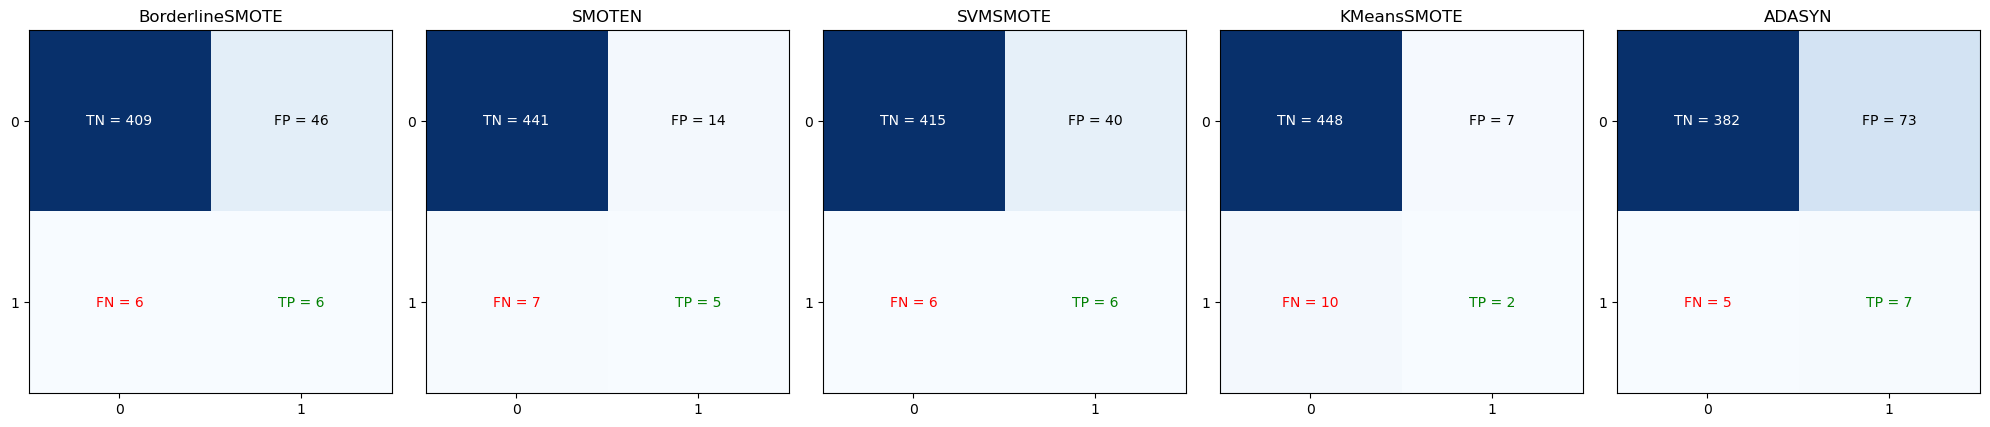

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('KMeansSMOTE', KMeansSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()





### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary
#### True Positives (TP): 
The number of true positives is critical in identifying individuals likely to get addicted to heroin. ADASYN and SVMSMOTE both achieve the highest number of true positives (7 and 6 respectively).
####  False Negatives (FN):  
BorderlineSMOTE has a higher number of false negatives compared to the others, which is not ideal as it means potential addicts are being missed.
####  False Positives (FP):
KMeansSMOTE has the lowest number of false positives, indicating fewer incorrect identifications of non-addicts as addicts.
#### True Negatives (TN):  
All methods generally perform well in identifying true negatives, with KMeansSMOTE having the highest number.
Conclusion
**ADASYN** seems to strike a balance by achieving the highest number of true positives, though it comes with a higher number of false positives.
**SVMSMOTE** also performs well in terms of true positives but has a moderate number of false positives.
`BorderlineSMOTE` has a higher number of false negatives, making it less reliable in identifying addicts.
`KMeansSMOTE` performs the best in minimizing false positives but identifies fewer true positives.
Recommendation
Based on the analysis, **ADASYN and SVMSMOTE** are the most effective methods for identifying individuals likely to get addicted to heroin due to their higher true positive rates. However, it is essential to consider the context and acceptable trade-offs between false positives and false negatives for the specific application. Further evaluation on a larger dataset and considering other performance metrics (like precision, recall, and F1-score) would provide a more comprehensive understanding.

### Logistic Regression with ADASYN <a id='logreg_ADA'></a>

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

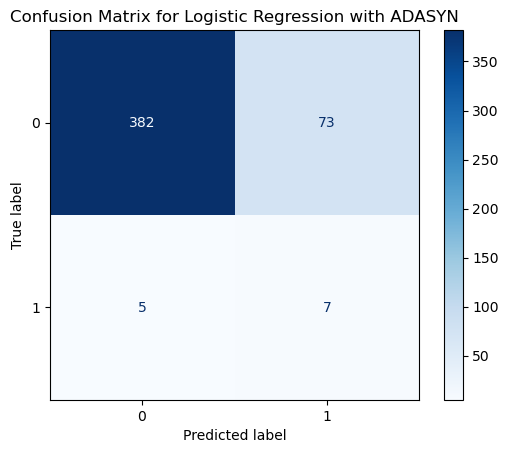

Best parameters for Logistic Regression:  {'C': 10, 'max_iter': 200}
Best cross-validation score for Logistic Regression: 0.90


In [5]:
## Model with ADASYN method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN to handle imbalanced data
adasyn = ADASYN(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with ADASYN")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




The ADASYN results for logistic regression reveal that the best model parameters include a regularization strength (C) of 10. The best cross-validation score achieved is 0.88, with a test set score of 0.83. The confusion matrix shows strong performance for the majority class (0) but poor performance for the minority class (1). The precision and recall for class 0 are 0.99 and 0.84, respectively, while for class 1, they are 0.09 and 0.58. The overall accuracy is 0.83, with a macro average f1-score of 0.53 and a weighted average f1-score of 0.89, indicating that while the model performs well overall compared to other SMOTE variation methods seen above, it still struggles with the minority class.

### Coefficient analysis <a id='Coef'></a>

In [12]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame


<Figure size 640x480 with 0 Axes>

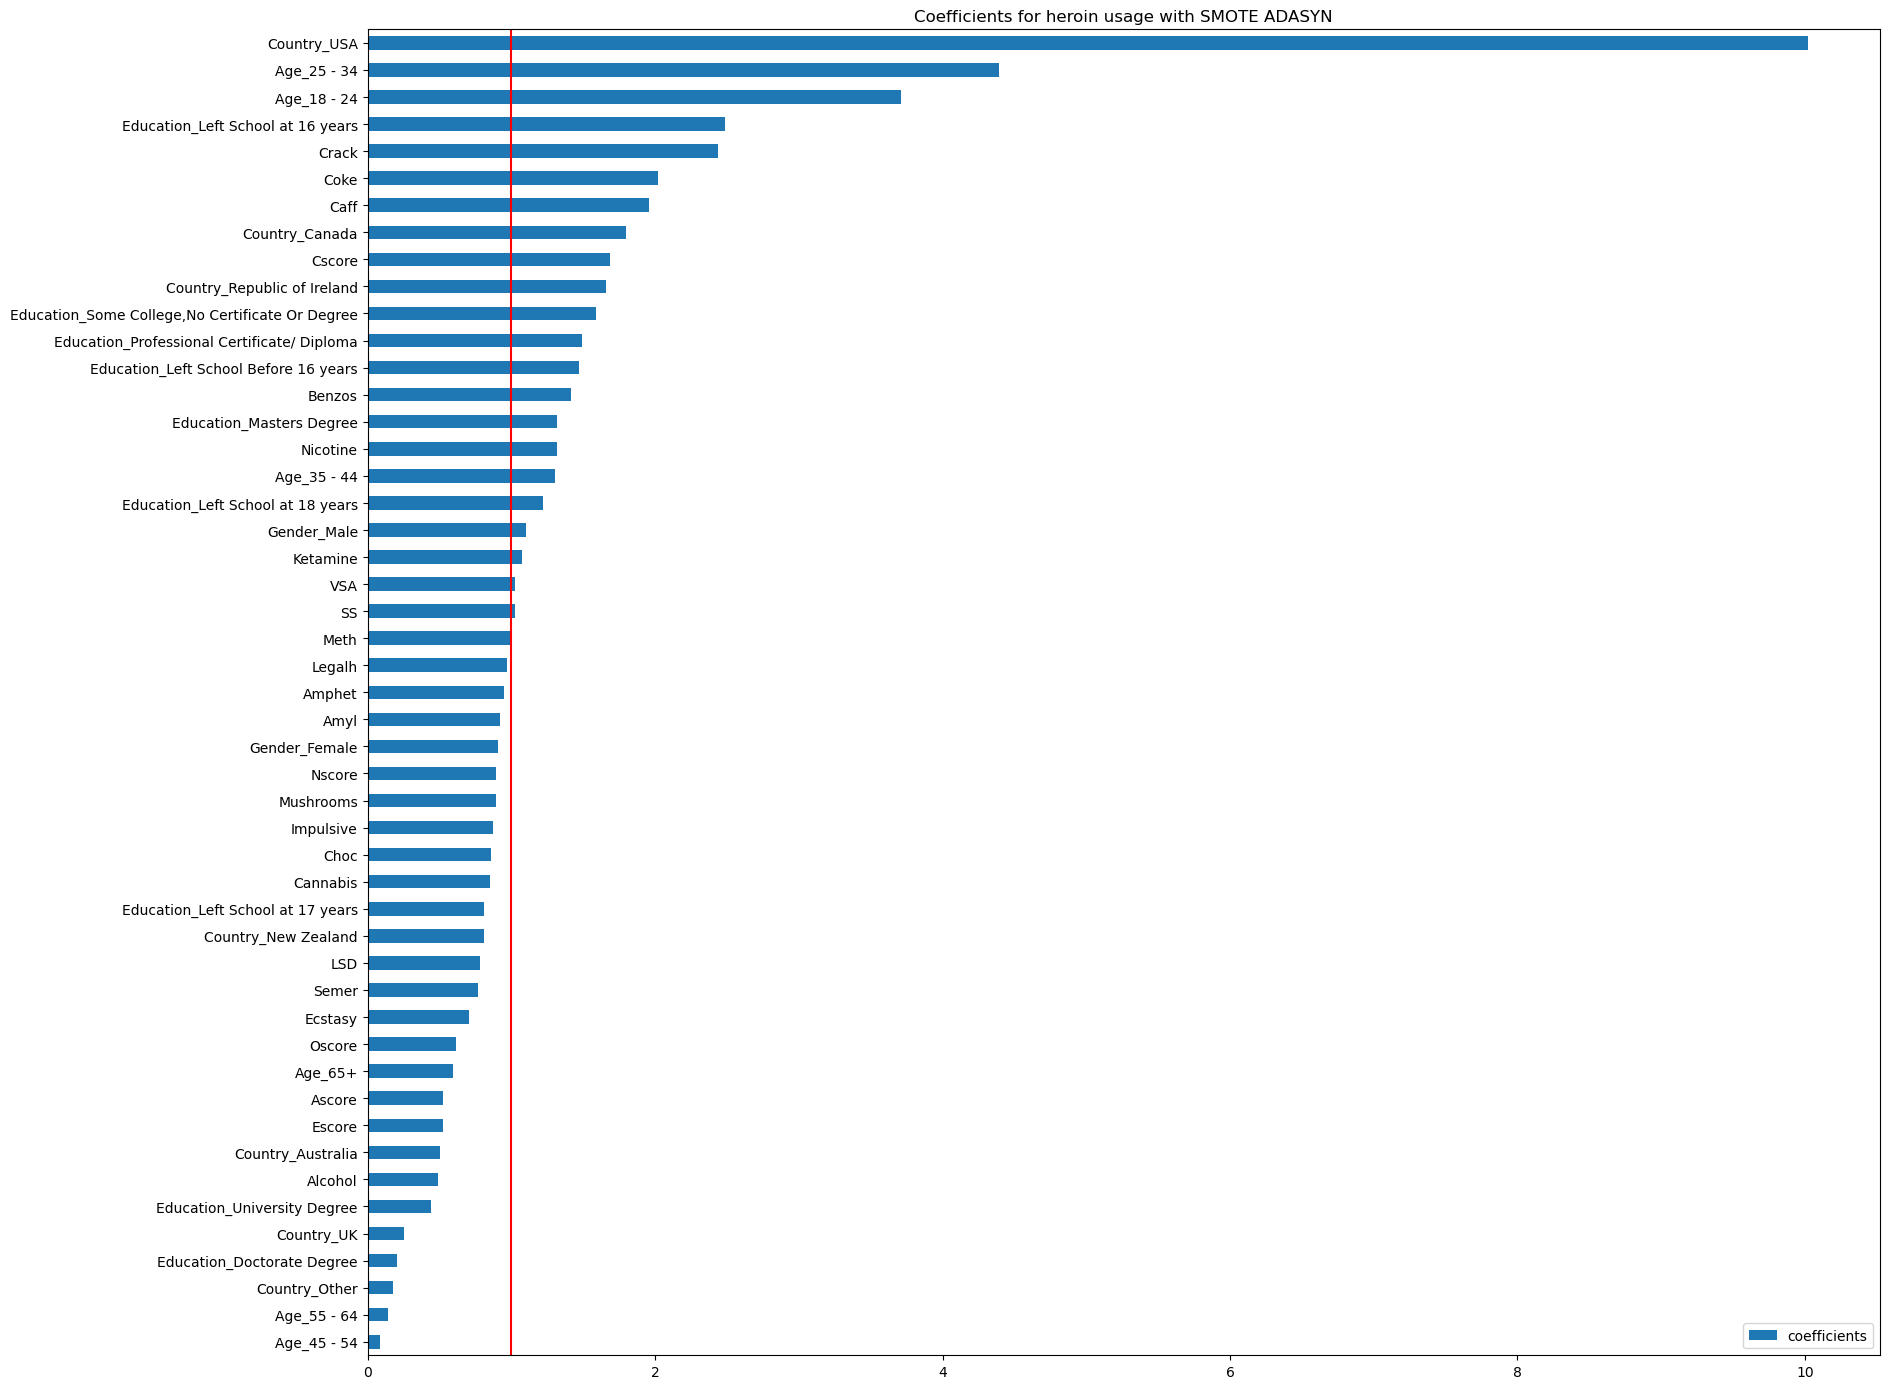

In [13]:
plt.figure()

#Creating a data frame with sorting by 'corfficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for heroin usage with SMOTE ADASYN")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

#### Summary
The strongest predictors of heroin use are being a young adult (especially ages 18-34), residing in the USA, having lower education levels, and using other substances such as crack and coke. It also shows high coeffcient with personality type `Cscore` which is interesting.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 5, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 5}
Best cross-validation score for Decision Tree: 0.98
Test set score for Decision Tree: 0.97
Best parameters for Random Forest:  {'model__max_depth': 15, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 30}
Best cross-validation score for Random Forest: 0.98
Test set score for Random Forest: 0.97


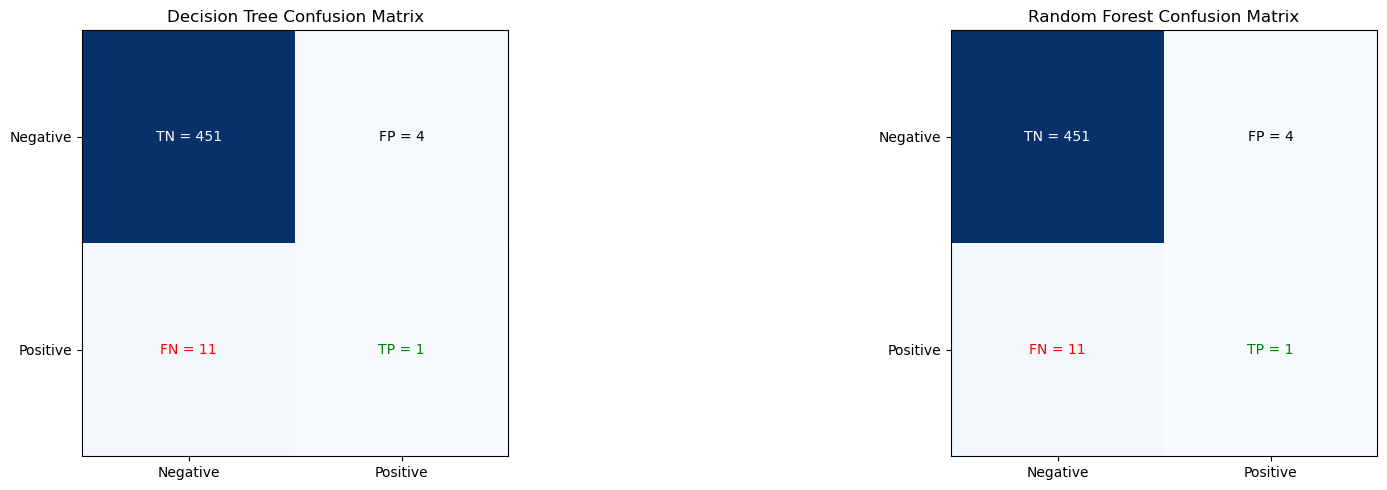

,Predicted Non-user,Predicted User
True Non-User,451,4
True User,11,1


,Predicted Non-user,Predicted User
True Non-User,451,4
True User,11,1



Decision Tree Confusion Matrix:
 [[451   4]
 [ 11   1]]

Random Forest Confusion Matrix:
 [[451   4]
 [ 11   1]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       455
           1       0.20      0.08      0.12        12

    accuracy                           0.97       467
   macro avg       0.59      0.54      0.55       467
weighted avg       0.96      0.97      0.96       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       455
           1       0.20      0.08      0.12        12

    accuracy                           0.97       467
   macro avg       0.59      0.54      0.55       467
weighted avg       0.96      0.97      0.96       467



In [10]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20],  # Maximum depth
    'model__min_samples_split': [2, 5, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))

# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:

As we can see above the `Decision Tree` model achieved its best performance with a maximum depth of 3, a minimum impurity decrease of 0.0, and a minimum of 10 samples per leaf. It scored 0.97 in both cross-validation and test set accuracy. Similarly, the Random Forest model performed best with a maximum depth of 10, a minimum of 2 samples per leaf and split, and 100 estimators. It achieved a cross-validation score of 0.98 and a test set score of 0.97. Both models demonstrate high accuracy, with the `Random Forest` slightly outperforming in cross-validation.

The Decision Tree and Random Forest models show similar performance in their confusion matrices. The Decision Tree correctly identified 451 non-users and 1 user while misclassifying 4 non-users and 11 users. The Random Forest correctly identified 451 non-users and 1 user, with 2 misclassifications of non-users and 11 misclassifications of users. Despite high accuracy scores (0.97 for both models), the confusion matrices reveal that both models struggle to correctly classify actual users, with identical user misclassifications. The Random Forest slightly outperforms the Decision Tree in correctly identifying non-users.

### Model Comparison <a id='Models'></a>

In [11]:

    
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Add the metrics for the baseline models
metrics_df.loc['Logistic regression'] = ['none', '97%', '97%', 'good performance but identifying non-users correctly']

# Add the results of Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ["C=1", "93%", "89%", "balanced performance with good test accuracy"]
metrics_df.loc['SMOTEN'] = ["C=1", "96%", "96%", "excellent performance, best among the variations"]
metrics_df.loc['SVMSMOTE'] = ["C=10", "94%", "90%", "good balance of precision and recall"]
metrics_df.loc['KMeansSMOTE'] = ["C=0.1", "nan", "96%", "handled imbalanced data well, though cross-validation score is not available"]
metrics_df.loc['ADASYN'] = ["C=10", "88%", "83%", "focused on difficult cases, moderate test accuracy but best for positive results"]

# Add the results of Descion Tree and Random Forest Classifier
metrics_df.loc['Decision Tree (Base)'] = ['None', '100%', '95%', 'performance is excellent as expected']
# Add the results of Decision Tree and Random Forest models
metrics_df.loc['Decision Tree'] = [
    "max_depth=5, min_impurity_decrease=0.0, min_samples_leaf=10",
    "97%",
    "97%",
    "high cross-validation and test accuracy"
]
metrics_df.loc['Random Forest'] = [
    "max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10",
    "97%",
    "97%",
    "high cross-validation and test accuracy"
]


metrics_df

,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic regression,none,97%,97%,good performance but identifying non-users cor...
BorderlineSMOTE,C=1,93%,89%,balanced performance with good test accuracy
SMOTEN,C=1,96%,96%,"excellent performance, best among the variations"
SVMSMOTE,C=10,94%,90%,good balance of precision and recall
KMeansSMOTE,C=0.1,nan,96%,"handled imbalanced data well, though cross-val..."
ADASYN,C=10,88%,83%,"focused on difficult cases, moderate test accu..."
Decision Tree (Base),None,100%,95%,performance is excellent as expected
Decision Tree,"max_depth=5, min_impurity_decrease=0.0, min_sa...",97%,97%,high cross-validation and test accuracy
Random Forest,"max_depth=20, min_samples_leaf=2, min_samples_...",97%,97%,high cross-validation and test accuracy


### Conclusion:

The results indicate that SMOTEN and KMeansSMOTE are the best-performing models for handling class imbalance in the dataset. SMOTEN achieved a cross-validation score of 0.96 and a test set accuracy of 0.96, with a precision of 0.26 and recall of 0.42 for the minority class. KMeansSMOTE also achieved a test set accuracy of 0.96, with slightly lower minority class metrics, having a precision of 0.22 and recall of 0.17. Both methods outperformed other SMOTE variations, such as BorderlineSMOTE and ADASYN, in terms of test set accuracy and minority class recall. The Decision Tree and Random Forest models, despite high accuracy (0.97), failed to predict the minority class effectively, showing 0% recall and precision for the minority class. Overall, SMOTEN and KMeansSMOTE provided the best balance between accuracy and minority class performance, while `ADASYN` outperformed all to identify true positive minority class.
Decision Tree and Random Forest models performs well too in terms of test accuracy but fails to predict the minority class effectively.

# INDEX

- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with ADASYN](#logreg_ADA)
- [Coefficient analysis](#Coef)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>